In [63]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import os, json


pd.set_option('display.max_rows', None)

def display_img(img_id):
    img_path = "dataset/img/"
    img = mpimg.imread(f"{img_path}/{id_to_img(img_id)}")
    imgplot = plt.imshow(img)
    plt.show()
    
def id_to_img(img_id):
    return str(img_id).zfill(5) + ".png"

def read_data(split_file):
    with open(os.path.join("dataset",split_file+".jsonl")) as f:
        json_list = [json.loads(json_dict) for json_dict in f.readlines()]
    return pd.DataFrame(json_list)

def read_objects(split_df):
    try:
        from collections import defaultdict
        objects = defaultdict(list)
        for img_id in split_df.id:
            img_feat_info = np.load(os.path.join("dataset","own_features", str(img_id).zfill(5) + "_info.npy"), 
                                    allow_pickle=True).item()

            objects["object_id"] += list(img_feat_info["objects_id"])
            objects["object_conf"] += list(img_feat_info["objects_conf"])
            objects["image_id"] += [img_id] * len(img_feat_info["objects_id"])
            objects["x1"] += list(img_feat_info["bbox"][:,0])
            objects["y1"] += list(img_feat_info["bbox"][:,1])
            objects["x2"] += list(img_feat_info["bbox"][:,2])
            objects["y2"] += list(img_feat_info["bbox"][:,3])
        
        return pd.DataFrame(objects).reset_index()       
    except NameError as e:
        print(e)
        print("* Please read the dataset with read_data() before calling read_objects() *")

def get_top3(x):
    return x.sort_values("object_conf", ascending=False).head(3)

def get_top3_coords(img_id, objects_df):
    top3 = objects_df[objects_df["image_id"]==img_id].groupby("object_id").apply(get_top3)
    bbox_coords = top3[["x1", "y1", "x2", "y2"]].values
    return bbox_coords

def get_all_coords(img_id, objects_df):
    top3 = objects_df[objects_df["image_id"]==img_id]
    bbox_coords = top3[["x1", "y1", "x2", "y2"]].values
    return bbox_coords

def get_most_conf_coords(img_id, objects_df, conf_thresh=0.5):
    top3 = objects_df[objects_df["image_id"]==img_id][objects_df["object_conf"]>conf_thresh]
    bbox_coords = top3[["x1", "y1", "x2", "y2"]].values
    return bbox_coords

def show_img_bboxes(img_id, bbox_coords):
    img_path = "dataset/img/"
    img = mpimg.imread(f"{img_path}/{id_to_img(img_id)}")

    # Create figure and axes
    fig, ax = plt.subplots()
    ax.imshow(img)
    for i, (x1, y1, x2, y2) in enumerate(bbox_coords):
        bbox = plt.Rectangle((x1, y1), x2-x1, y2-y1, fill=False, color="black")
        ax.add_patch(bbox)
    plt.show()

In [64]:
train, dev, test = [read_data(split_file) for split_file in ["train", "dev_seen", "test_seen"]]

In [65]:
create_train_dev_obj = False
if create_train_dev_obj:
    train_objects = read_objects(train)
    dev_objects = read_objects(dev)
    train_dev_objects = pd.concat([train_objects, dev_objects])
    train_dev_objects.to_csv("train_dev_objects.csv")
else:
    train_dev_objects = pd.read_csv("train_dev_objects.csv")

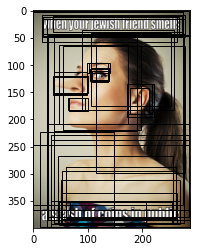

In [66]:
img_id = 19536
top3_coords = get_top3_coords(img_id, train_dev_objects)
show_img_bboxes(img_id, top3_coords)

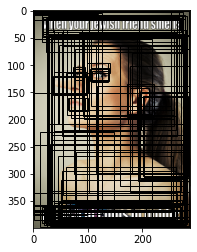

In [67]:
img_id = 19536
top3_coords = get_all_coords(img_id, train_dev_objects)
show_img_bboxes(img_id, top3_coords)

d:\blazej\programs\anaconda\envs\m2\lib\site-packages\ipykernel_launcher.py:59: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


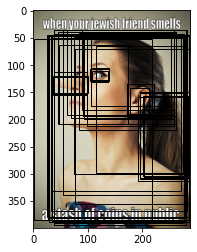

In [68]:
img_id = 19536
top3_coords = get_most_conf_coords(img_id, train_dev_objects)
show_img_bboxes(img_id, top3_coords)

In [244]:
train.head()

,id,img,label,text
0,42953,img/42953.png,0,its their character not their color that matters
1,23058,img/23058.png,0,don't be afraid to love again everyone is not ...
2,13894,img/13894.png,0,putting bows on your pet
3,37408,img/37408.png,0,i love everything and everybody! except for sq...
4,82403,img/82403.png,0,"everybody loves chocolate chip cookies, even h..."


In [246]:
train.label.value_counts(), dev.label.value_counts()

(0    5481
 1    3019
 Name: label, dtype: int64,
 0    253
 1    247
 Name: label, dtype: int64)

In [14]:
dev_preds = pd.read_csv("model_checkpoints/meme_dev_seen_preds.csv")

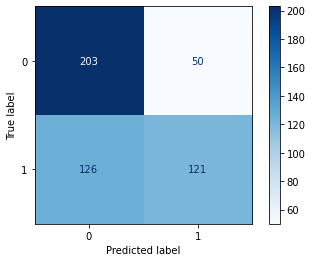

In [86]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(dev_preds["gt"], dev_preds["label"])

cm_display = ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Blues)

In [15]:
dev_preds

,id,proba,label,gt
0,8291,0.231215,0,1
1,46971,0.005101,0,1
2,3745,0.298762,0,1
3,83745,0.043060,0,1
4,80243,0.993165,1,1
5,5279,0.294835,0,1
6,1796,0.132510,0,1
7,53046,0.006257,0,1
8,82301,0.006894,0,1
9,31752,0.941417,1,1


In [27]:
fps = dev_preds[(dev_preds["gt"]==0) & (dev_preds["label"]==1)]

In [49]:
fns = dev_preds[(dev_preds["gt"]==1) & (dev_preds["label"]==0)]

In [87]:
fps.sort_values("proba") # , ascending=False

,id,proba,label,gt
136,56428,0.503271,1,0
430,3798,0.505153,1,0
243,95176,0.520004,1,0
358,84107,0.530342,1,0
103,62504,0.533736,1,0
361,46085,0.536854,1,0
444,84150,0.542373,1,0
317,12067,0.552647,1,0
250,46812,0.573043,1,0
124,43910,0.576480,1,0


In [130]:
train[train["text"].str.startswith("when your jewish")]

,id,img,label,text


In [129]:
dev[dev["text"].str.startswith("when your jewish")]

,id,img,label,text
350,19536,img/19536.png,1,when your jewish friend smells a stash of coin...
444,84150,img/84150.png,0,when your jewish friend smells a stash of coin...


In [248]:
type(dev.id.values[0])

numpy.int64

In [165]:

# YOUR CODE HERE:  get the x and y coordinates from 'img_feat_info['bbox']'

# retrieve a matrix where each row i represents [x1, y1, x2, y2] coords (I suppose) of the ith object from the img
coords = img_feat_info["bbox"]
print(img_feat_info)

{'image_id': '19536', 'image_h': 400, 'image_w': 289, 'num_boxes': 100, 'objects_id': array([ 274,  119,  467,   90,  119,  327,  750, 1177,  391,  248,   51,
         90, 1038,  327, 1081,   90, 1179, 1038, 1179,  899,  467,   51,
        119, 1179, 1179, 1179,  248, 1038,  119,  467,  923,  683, 1179,
        391,   90,  248,   51,   90,   90, 1081,   90, 1038,  119,  119,
         90, 1179,   90,  119,   90, 1179,  750, 1177, 1081, 1038,   90,
        119,  248,   51,  274,   90,  923,   90,  119,   51,  119,  119,
        119,  119,   51,  248,  391,   90,  119, 1179,  248, 1596, 1179,
        119, 1179,  467,  119,  119,  327,   90,  274,  248,  119,  923,
        119,  248,  391,  119,  248,   90, 1038,  923, 1179, 1179,  119,
        467], dtype=int64), 'objects_conf': array([0.91141784, 0.7766131 , 0.61250645, 0.6136581 , 0.60556555,
       0.52071416, 0.45620412, 0.45528767, 0.64391744, 0.42707738,
       0.28157008, 0.59151995, 0.20600404, 0.32984072, 0.15676992,
       0.589

In [238]:
img_feat_info["bbox"].shape

(100, 4)

In [239]:
coords.shape

(43, 4)

In [211]:
img_feat_info["image_id"]

'19536'

In [226]:
img_objects = pd.DataFrame()

img_objects["objects_ids"] = img_feat_info["objects_id"]
img_objects["objects_conf"] = img_feat_info["objects_conf"]
img_objects["image_id"] = img_feat_info["image_id"]
img_objects["x1"] = img_feat_info["bbox"][:,0]
img_objects["y1"] = img_feat_info["bbox"][:,1]
img_objects["x2"] = img_feat_info["bbox"][:,2]
img_objects["y2"] = img_feat_info["bbox"][:,3]

In [227]:
img_objects

,objects_ids,objects_conf,image_id,x1,y1,x2,y2
0,274,0.911418,19536,173.691864,135.829361,218.072662,190.824905
1,119,0.776613,19536,90.254379,39.954857,262.692261,194.718262
2,467,0.612506,19536,103.490059,107.725464,138.541504,129.737259
3,90,0.613658,19536,28.497574,45.202393,288.000000,389.373657
4,119,0.605566,19536,196.135132,152.187958,277.691772,310.146973
5,327,0.520714,19536,47.146317,64.126060,173.431610,208.647095
6,750,0.456204,19536,98.143745,95.446289,140.784760,114.180923
7,1177,0.455288,19536,62.917183,160.232101,94.049706,182.138870
8,391,0.643917,19536,35.275269,121.869415,98.713806,155.660797
9,248,0.427077,19536,0.000000,0.000000,288.000000,367.580719


In [235]:
def getTop3(x):
    return x.sort_values("objects_conf", ascending=False).head(3)
top3 = img_objects.groupby("objects_ids").apply(getTop3)
coords = top3[["x1", "y1", "x2", "y2"]].values

<class 'matplotlib.axes._subplots.AxesSubplot'>


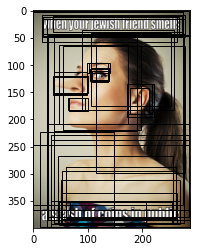

In [237]:
img_path = "dataset/img/"
img = mpimg.imread(f"{img_path}/{id_to_img(img_id)}")

# Create figure and axes
fig, ax = plt.subplots()
ax.imshow(img)
print(type(ax))
for i, (x1, y1, x2, y2) in enumerate(coords):
    bbox = plt.Rectangle((x1, y1), x2-x1, y2-y1, fill=False, color="black")
    ax.add_patch(bbox)
    
    
plt.show()

<class 'matplotlib.axes._subplots.AxesSubplot'>


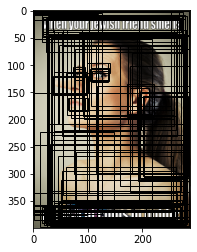

In [240]:
img_path = "dataset/img/"
img = mpimg.imread(f"{img_path}/{id_to_img(img_id)}")

# Create figure and axes
fig, ax = plt.subplots()
ax.imshow(img)
print(type(ax))
for i, (x1, y1, x2, y2) in enumerate(img_feat_info["bbox"]):
    bbox = plt.Rectangle((x1, y1), x2-x1, y2-y1, fill=False, color="black")
    ax.add_patch(bbox)
    
    
plt.show()

<class 'matplotlib.axes._subplots.AxesSubplot'>


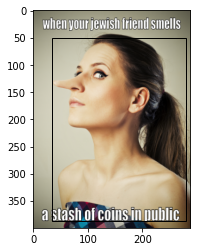

In [207]:
img_path = "dataset/img/"
img = mpimg.imread(f"{img_path}/{id_to_img(img_id)}")

# Create figure and axes
fig, ax = plt.subplots()
ax.imshow(img)
print(type(ax))
for i, (x1, y1, x2, y2) in enumerate(coords):
    if i==11:
        bbox = plt.Rectangle((x1, y1), x2-x1, y2-y1, fill=False, color="black")
        ax.add_patch(bbox)
        break
    
    
plt.show()

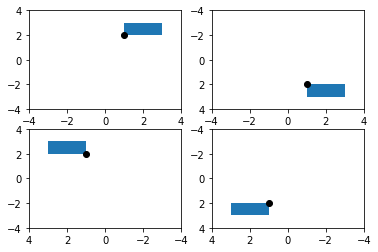

In [157]:
import matplotlib.pyplot as plt

def plot_rect(ax):
    rect = plt.Rectangle((1,2), 2, 1)
    ax.add_patch(rect)
    ax.scatter([1], [2], s=36, color="k", zorder=3)


fig, axs = plt.subplots(2,2)

xlims = ((-4,4), (-4,4), (4,-4), (4,-4))
ylims = ((-4,4), (4,-4), (-4,4), (4,-4))

for ax, xlim, ylim in zip(axs.flat, xlims, ylims):
    plot_rect(ax)
    ax.set(xlim=xlim, ylim=ylim)

plt.show()

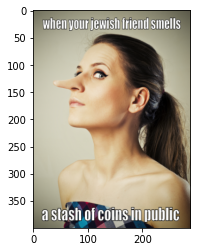

In [131]:
display_img(19536)

In [111]:
dev[dev["text"].str.startswith("i ordered")]

,id,img,label,text
358,84107,img/84107.png,0,i ordered a dishwasher and they sent me a sand...
374,35840,img/35840.png,1,i ordered a dishwasher and they sent me a sand...


In [177]:
import json
with open("objects.json") as f:
     vg_img = json.loads(f.read())

In [178]:
vg_img[0]

{'image_id': 1,
 'objects': [{'synsets': ['tree.n.01'],
   'h': 557,
   'object_id': 1058549,
   'merged_object_ids': [],
   'names': ['trees'],
   'w': 799,
   'y': 0,
   'x': 0},
  {'synsets': ['sidewalk.n.01'],
   'h': 290,
   'object_id': 1058534,
   'merged_object_ids': [5046],
   'names': ['sidewalk'],
   'w': 722,
   'y': 308,
   'x': 78},
  {'synsets': ['building.n.01'],
   'h': 538,
   'object_id': 1058508,
   'merged_object_ids': [],
   'names': ['building'],
   'w': 222,
   'y': 0,
   'x': 1},
  {'synsets': ['street.n.01'],
   'h': 258,
   'object_id': 1058539,
   'merged_object_ids': [3798578],
   'names': ['street'],
   'w': 359,
   'y': 283,
   'x': 439},
  {'synsets': ['wall.n.01'],
   'h': 535,
   'object_id': 1058543,
   'merged_object_ids': [],
   'names': ['wall'],
   'w': 135,
   'y': 1,
   'x': 0},
  {'synsets': ['tree.n.01'],
   'h': 360,
   'object_id': 1058545,
   'merged_object_ids': [],
   'names': ['tree'],
   'w': 476,
   'y': 0,
   'x': 178},
  {'synsets': 

In [179]:
object_id_to_name = {}
for img in vg_img:
    for obj in img["objects"]:
        if obj["object_id"] not in object_id_to_name:
            object_id_to_name[obj["object_id"]] = obj["names"]

In [183]:
object_id_to_name

{1058549: ['trees'],
 1058534: ['sidewalk'],
 1058508: ['building'],
 1058539: ['street'],
 1058543: ['wall'],
 1058545: ['tree'],
 5045: ['shade'],
 1058542: ['van'],
 5055: ['tree trunk'],
 1058498: ['clock'],
 3798579: ['windows'],
 3798576: ['man'],
 3798577: ['man'],
 1058548: ['lamp post'],
 1058507: ['sign'],
 1058515: ['car'],
 5060: ['back'],
 1058530: ['jacket'],
 5049: ['car'],
 1058531: ['pants'],
 1058511: ['shirt'],
 1058519: ['parking meter'],
 1058528: ['pants'],
 1058547: ['shirt'],
 1058525: ['shoes'],
 1058546: ['arm'],
 1058535: ['bike'],
 5051: ['bike'],
 5050: ['headlight'],
 1058518: ['glasses'],
 1058541: ['chin'],
 1023841: ['road'],
 1023813: ['sidewalk'],
 1023819: ['building'],
 1023846: ['building'],
 1023845: ['street light'],
 5077: ['crosswalk'],
 1023838: ['man'],
 1023847: ['pole'],
 5080: ['window'],
 1023836: ['car'],
 5074: ['tree'],
 5076: ['tree'],
 5075: ['tree'],
 5082: ['window'],
 5081: ['window'],
 5085: ['car'],
 5071: ['backpack'],
 5083: [

## Mislabelled?
To me all these 4 pictures mean the same but 2 of them are labelled as hateful and two as non-hateful

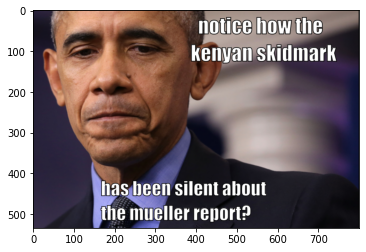

In [101]:
display_img(95176) 

In [106]:
display(dev_preds[dev_preds["id"]==95176])

,id,proba,label,gt
243,95176,0.520004,1,0


In [102]:
train[train["text"].str.startswith("notice how the")]

,id,img,label,text
5186,8176,img/08176.png,1,notice how the kenyan skidmark has been silent...
5539,18379,img/18379.png,1,notice how the kenyan skidmark has been silent...
6911,2647,img/02647.png,0,notice how the kenyan skidmark has been silent...


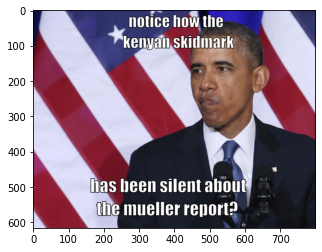

,id,img,label,text
5186,8176,img/08176.png,1,notice how the kenyan skidmark has been silent...


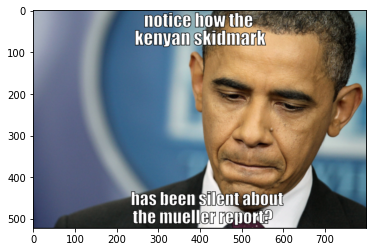

,id,img,label,text
5539,18379,img/18379.png,1,notice how the kenyan skidmark has been silent...


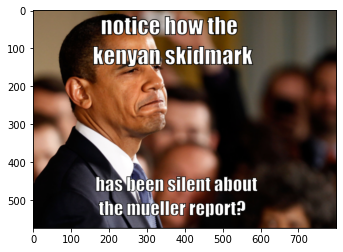

,id,img,label,text
6911,2647,img/02647.png,0,notice how the kenyan skidmark has been silent...


In [105]:
for img in [8176, 18379, 2647]:
    display_img(img)
    display(train[train["id"]==img])

In [67]:
train[train["text"].str.startswith("safe sex")]

,id,img,label,text
5050,30854,img/30854.png,0,safe sex isis style
5883,57162,img/57162.png,0,safe sex isis style
7150,36540,img/36540.png,0,safe sex isis style


In [76]:
dev[dev["text"].str.startswith("safe sex")]

,id,img,label,text
19,9563,img/09563.png,1,safe sex isis style


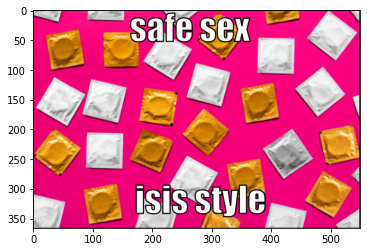

In [75]:
display_img(36540)

## Examples that seem mislabelled or very subtle

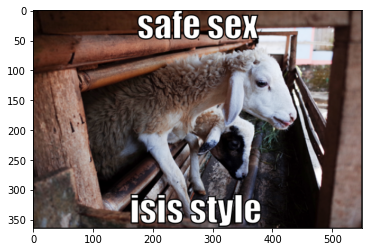

In [71]:
display_img(57162)

In [74]:
train[train["id"]==57162]

,id,img,label,text
5883,57162,img/57162.png,0,safe sex isis style


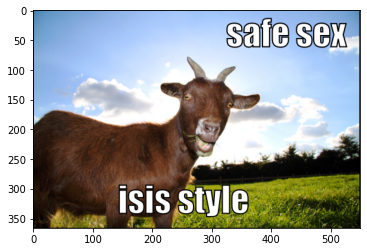

In [70]:
display_img(9563)

In [72]:
dev_preds[dev_preds["id"]==9563]

,id,proba,label,gt
19,9563,0.009264,0,1


## Check other thresholds

In [25]:
import torch
from utils import metrics

In [19]:
probs = torch.Tensor(dev_preds["proba"])
labels = torch.Tensor(dev_preds["gt"])
threshold_metrics = [metrics.standard_metrics_binary(probs, labels, thresh) for thresh in np.arange(0, 1, step=0.1)]
metrics_per_thresh = pd.DataFrame(threshold_metrics)

In [24]:
metrics_per_thresh

,accuracy,precision,recall,f1,aucroc
0,tensor(0.4940),tensor(1.),tensor(0.4940),tensor(0.6613),0.717495
1,tensor(0.6560),tensor(0.7530),tensor(0.6263),tensor(0.6838),0.717495
2,tensor(0.6740),tensor(0.6842),tensor(0.6654),tensor(0.6747),0.717495
3,tensor(0.6700),tensor(0.6194),tensor(0.6830),tensor(0.6497),0.717495
4,tensor(0.6680),tensor(0.5668),tensor(0.7035),tensor(0.6278),0.717495
5,tensor(0.6480),tensor(0.4899),tensor(0.7076),tensor(0.5789),0.717495
6,tensor(0.6540),tensor(0.4534),tensor(0.7467),tensor(0.5642),0.717495
7,tensor(0.6340),tensor(0.3765),tensor(0.7623),tensor(0.5041),0.717495
8,tensor(0.6120),tensor(0.3077),tensor(0.7677),tensor(0.4393),0.717495
9,tensor(0.5920),tensor(0.2267),tensor(0.8116),tensor(0.3544),0.717495
